In [498]:
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [499]:
dataset = datasets.make_classification(n_samples =100, n_features=2, n_redundant = 0)

In [500]:
X, y = dataset
y = y.reshape(-1,1)
X.shape, y.shape

((100, 2), (100, 1))

In [501]:
class LogisticRegression:
    
    def __init__(self, lr, n_features):
        self.lr = lr
        self.w = np.zeros((n_features,1))
        self.b = np.zeros((1, 1))
        # X = > M, N # M, N + 1
        # Y = > M, 1
        # W = > N, 1 # N+1, 1
    
    def loss(self, X, y_hat, y):
        m = X.shape[0]
        return  (-1/m) * np.sum(y * np.log(y_hat) + (1-y)*np.log(1-y_hat))
    
    def sigmoid(self, Z):
        return (1/(1 + np.exp(-Z)))
    
    def gradient_w(self, X, y_hat, y):

        return 1/X.shape[0] * X.T @ (y_hat - y)
    
    def gradient_b(self, X, y_hat, y):
        return 1/X.shape[0] * np.sum(y_hat - y)
    
    def predict(self, X):
        return self.sigmoid(X @ self.w + self.b)
    
    def predict_grid(self, X):
        print(X.shape)
        print(self.w.shape)
        print(self.w[1:,:].shape)
        return self.sigmoid(X @ self.w[1:, :] + self.w[0,:])
    
    def fit(self, X, y):

        predict = self.predict(X)
        loss = self.loss(X, predict, y)
        self.w = self.w - self.lr * self.gradient_w(X, predict, y)
        self.b = self.b - self.lr * self.gradient_b(X, predict, y)
        print("loss is ", loss.mean())
            
        
        

In [502]:
#X = np.hstack( [ np.ones((X.shape[0], 1)), X]   )
model = LogisticRegression(lr=1e-1, n_features = X.shape[1])

In [503]:
import time
from matplotlib import interactive
interactive(True)
epochs = 100
for i in range(epochs):
    model.fit(X, y)


loss is  0.6931471805599453
loss is  0.6640215733145246
loss is  0.6372391068024983
loss is  0.6125872558122994
loss is  0.5898661976527999
loss is  0.5688909148220115
loss is  0.5494921223437581
loss is  0.5315163224627242
loss is  0.5148252598142682
loss is  0.49929500086434025
loss is  0.48481480807889094
loss is  0.4712859308128382
loss is  0.45862039510831837
loss is  0.4467398441244197
loss is  0.4355744588376968
loss is  0.42506197339007423
loss is  0.415146789394215
loss is  0.40577918721151596
loss is  0.3969146285543173
loss is  0.38851314287117755
loss is  0.38053878922996787
loss is  0.37295918538293793
loss is  0.3657450960852629
loss is  0.3588700733486607
loss is  0.35231014201929356
loss is  0.3460435247969654
loss is  0.3400504015151044
loss is  0.3343126981534651
loss is  0.3288139016464611
loss is  0.3235388970762134
loss is  0.31847382430229937
loss is  0.31360595148396114
loss is  0.30892356330058185
loss is  0.30441586197845055
loss is  0.30007287949195155
loss is

# Decision boundary

In [504]:
import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
def plot_decision(classifier, X, threshold):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = model.predict(grid)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    
        
def plot_decision_bias(classifier, X, threshold):
    min1, max1 = X[:, 1].min()-1, X[:, 1].max()+1
    min2, max2 = X[:, 2].min()-1, X[:, 2].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = model.predict_grid(grid)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 1], X[row_ix, 2], cmap='Paired')
        plt.scatter(0,0, s=20)

/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_1945/1720062664.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


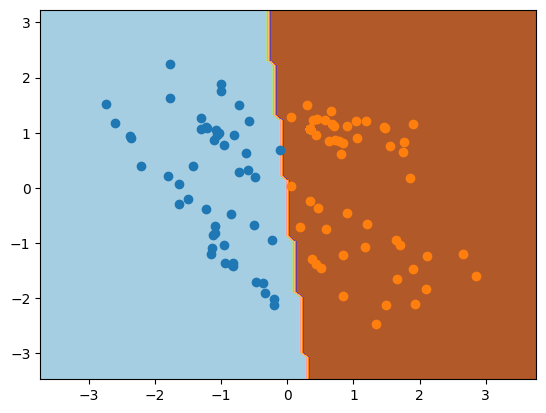

In [510]:
plot_decision(model, X, 0.5)

In [461]:
grid.shape

(4736, 2)

In [288]:
model.w.shape

(3, 1)

In [289]:
X.shape

(100, 3)